In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst","PeptideCount"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names","PeptideCount"]]
print(utmb_data.shape)
# utmb_data.head()

(1773, 5)


In [23]:
Liver15N2H_GVB_Mouse=pd.read_csv("Liver.Proteins.Turnover.15N.and.2H.GVB_Mouse.csv",skiprows=1)[["Uniprot Gene Name","k0",'# Total Peptides']]
print(Liver15N2H_GVB_Mouse.shape)
# Liver15N2H_GVB_Mouse.head()

(1329, 3)


In [24]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],right_on=["Entry name"])
print(utmb_Liver15N2H_GVB_Mouse.shape)
utmb_Liver15N2H_GVB_Mouse.head()

(1098, 8)


,Uniprot Gene Name,k0,# Total Peptides,Entry,Entry name,rateconst,Gene names,PeptideCount
0,LPP60_MOUSE,0.805279,2,A0JNU3,LPP60_MOUSE,0.732540,Aspg,10
1,FGGY_MOUSE,0.126051,4,A2AJL3,FGGY_MOUSE,0.291233,Fggy,11
2,SPEB_MOUSE,0.123579,6,A2AS89,SPEB_MOUSE,0.101904,Agmat,14
3,DHTK1_MOUSE,0.141873,40,A2ATU0,DHTK1_MOUSE,0.252823,Dhtkd1 Kiaa1630,11
4,SC22B_MOUSE,0.202260,9,O08547,SC22B_MOUSE,0.294941,Sec22b Sec22l1,5


In [5]:
# corr= utmb_Liver15N2H_GVB_Mouse[['k0','rateconst']].corr()
# corr

## 1. No Filter

Text(0, 0.5, 'UTMB')

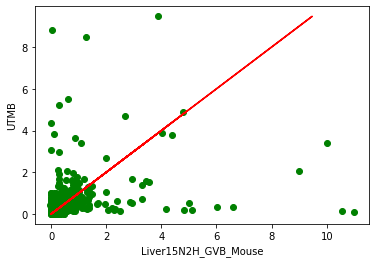

In [6]:
plt.scatter(utmb_Liver15N2H_GVB_Mouse.k0,utmb_Liver15N2H_GVB_Mouse.rateconst,c='g')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.plot(utmb_Liver15N2H_GVB_Mouse.rateconst,utmb_Liver15N2H_GVB_Mouse.rateconst,c='r')
plt.ylabel("UTMB")

(818, 8)
corr 0.657223183449995


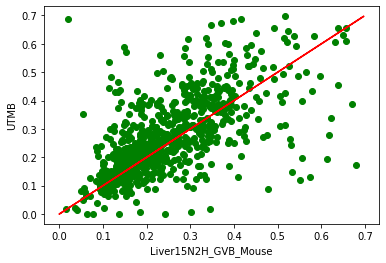

In [7]:
temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<=0.7)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
                                (utmb_Liver15N2H_GVB_Mouse.rateconst<=0.7)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
print(temp.shape)
plt.scatter(temp.k0,temp.rateconst,c='g')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")
corr= temp[['k0','rateconst']].corr()
print("corr",corr['k0']['rateconst'])

## 2. Total No. Peptides > 3

In [50]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],right_on=["Entry name"])

utmb_Liver15N2H_GVB_Mouse=utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.rateconst>0 )
                                                    &(utmb_Liver15N2H_GVB_Mouse.rateconst<=0.7 )
                                                    &(utmb_Liver15N2H_GVB_Mouse.k0>0)
                                                    &(utmb_Liver15N2H_GVB_Mouse.k0<=0.7)
                                                   ]

utmb_Liver15N2H_GVB_Mouse= utmb_Liver15N2H_GVB_Mouse[ (utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>=4) 
                               & (utmb_Liver15N2H_GVB_Mouse.PeptideCount>=4)]

utmb_Liver15N2H_GVB_Mouse.k0=[math.log(2)/x for x in utmb_Liver15N2H_GVB_Mouse.k0]
utmb_Liver15N2H_GVB_Mouse.rateconst=[math.log(2)/x for x in utmb_Liver15N2H_GVB_Mouse.rateconst]


utmb_Liver15N2H_GVB_Mouse=utmb_Liver15N2H_GVB_Mouse[ (utmb_Liver15N2H_GVB_Mouse.rateconst<=10 ) 
                                                    &(utmb_Liver15N2H_GVB_Mouse.rateconst >=1 )
                                                    &(utmb_Liver15N2H_GVB_Mouse.k0<=10)
                                                   &(utmb_Liver15N2H_GVB_Mouse.k0>=1)
                                                   ]

(614, 8)
corr 0.7608329052576158


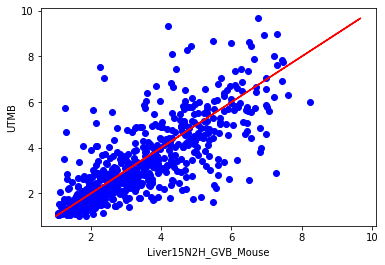

In [51]:
temp=utmb_Liver15N2H_GVB_Mouse
print(temp.shape)
plt.scatter(temp.k0,temp.rateconst,c='b')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")
corr= temp[['k0','rateconst']].corr()
print("corr",corr['k0']['rateconst'])